# Importing dependencies

In [21]:
import numpy 
import cv2
from keras import *
from sklearn.model_selection import train_test_split
from os import listdir
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

# Data part

In [22]:
# to unzip the dataset file 
import zipfile as zf
files = zf.ZipFile("dl_dataset.zip", 'r')
files.extractall('Alzheimer28_data')
files.close()

In [23]:
directory_root = "Alzheimer28_data"
default_image_size = tuple((128, 128))

In [24]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [25]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Very_Mild_Demented ...
[INFO] Processing Non_Demented ...
[INFO] Processing Mild_Demented ...
[INFO] Processing Moderate_Demented ...
[INFO] Image loading completed


# CNN Model - low accuracy 

In [ ]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
#Part 1 - Build Model
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import LeakyReLU

In [ ]:
#temp
labels = numpy.full((200,1),1)
label = numpy.full((200,1),2)
lab = numpy.concatenate((labels,label),axis=0)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='LeakyReLU', input_shape=(128,128,3)))
model.add(Conv2D(64, (3, 3), activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Conv2D(64, (3, 3), padding='same', activation='LeakyReLU'))
model.add(Conv2D(64, (3, 3), activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Conv2D(128, (3, 3), padding='same', activation='LeakyReLU'))
model.add(Conv2D(128, (3, 3), activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Conv2D(128, (3, 3), padding='same', activation='LeakyReLU'))
model.add(Conv2D(128, (3, 3), activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(1024, activation='LeakyReLU'))
model.add(Dropout(0.6))
#model.add(Dense(39, activation='softmax'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [ ]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
np_image_list = numpy.array(image_list, dtype=numpy.float16) / 225.0

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

[INFO] Spliting data to train, test


In [ ]:
aug = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

In [ ]:
model.fit(
    aug.flow(x_train, y_train, batch_size=8),
    validation_data=(x_test, y_test),
    steps_per_epoch=67,
    epochs=10)

Epoch 1/10
67/67 [==============================] - 22s 78ms/step - loss: 1.3833 - accuracy: 0.2655 - val_loss: 1.3313 - val_accuracy: 0.3684
Epoch 2/10
67/67 [==============================] - 4s 58ms/step - loss: 1.3567 - accuracy: 0.2844 - val_loss: 1.3313 - val_accuracy: 0.3684
Epoch 3/10
67/67 [==============================] - 3s 43ms/step - loss: 1.3375 - accuracy: 0.2844 - val_loss: 1.3344 - val_accuracy: 0.3684
Epoch 4/10
67/67 [==============================] - 3s 43ms/step - loss: 1.3245 - accuracy: 0.2844 - val_loss: 1.3396 - val_accuracy: 0.3684
Epoch 5/10
67/67 [==============================] - 3s 49ms/step - loss: 1.3151 - accuracy: 0.2844 - val_loss: 1.3454 - val_accuracy: 0.3684
Epoch 6/10
67/67 [==============================] - 3s 51ms/step - loss: 1.3085 - accuracy: 0.2844 - val_loss: 1.3510 - val_accuracy: 0.3684
Epoch 7/10
67/67 [==============================] - 3s 43ms/step - loss: 1.3038 - accuracy: 0.2844 - val_loss: 1.3574 - val_accuracy: 0.3684
Epoch 8/10
6

# CNN Model - medium accuracy

## changing split way and model.compile loss function to get high accuracy 

In [30]:
import splitfolders
splitfolders.ratio('Alzheimer28_data/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [00:01, 6116.17 files/s]


In [31]:
#trying another split way
IMG_HEIGHT = 128
IMG_WIDTH = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [32]:
# to see the names of the classes
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

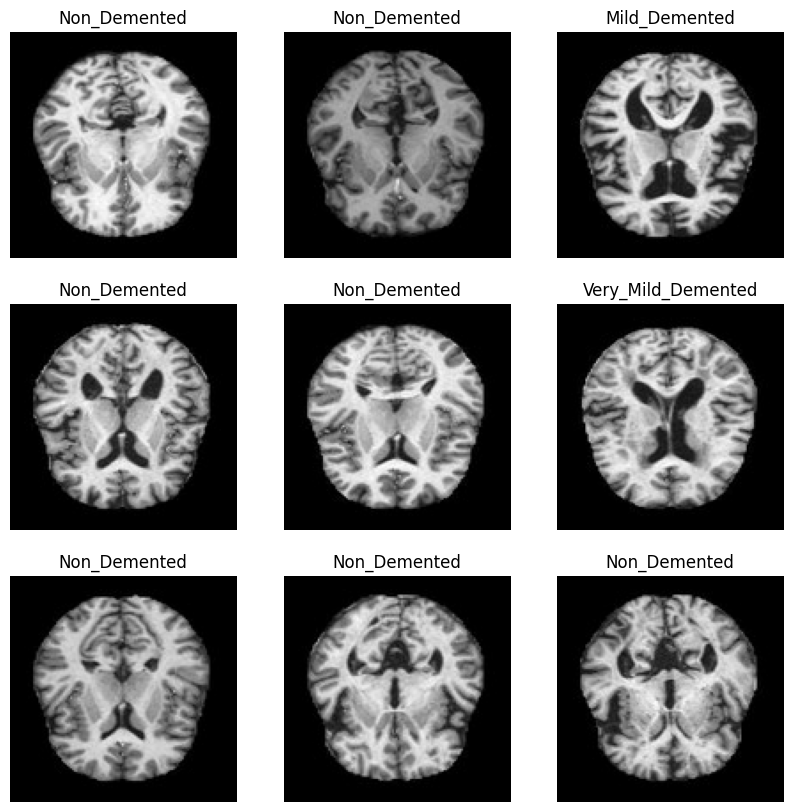

In [33]:
# to display 9 images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

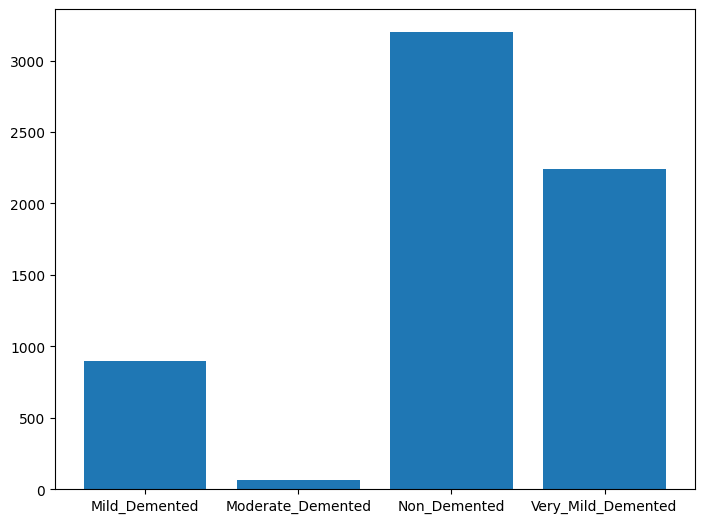

In [34]:
# to count the images in each class, then display it as histogram
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

In [35]:
#Compiling the CNN (new loss function)
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "adam",metrics=["accuracy"])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                        

In [46]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    verbose=1)

Epoch 1/20
80/80 [==============================] - 16s 198ms/step - loss: 1.0434 - accuracy: 0.5001 - val_loss: 1.0403 - val_accuracy: 0.5008
Epoch 2/20
80/80 [==============================] - 15s 185ms/step - loss: 1.0420 - accuracy: 0.5001 - val_loss: 1.0390 - val_accuracy: 0.5008
Epoch 3/20
80/80 [==============================] - 16s 192ms/step - loss: 1.0409 - accuracy: 0.5001 - val_loss: 1.0380 - val_accuracy: 0.5008
Epoch 4/20
80/80 [==============================] - 15s 184ms/step - loss: 1.0400 - accuracy: 0.5001 - val_loss: 1.0371 - val_accuracy: 0.5008
Epoch 5/20
80/80 [==============================] - 15s 185ms/step - loss: 1.0392 - accuracy: 0.5001 - val_loss: 1.0364 - val_accuracy: 0.5008
Epoch 6/20
80/80 [==============================] - 16s 192ms/step - loss: 1.0386 - accuracy: 0.5001 - val_loss: 1.0357 - val_accuracy: 0.5008
Epoch 7/20
80/80 [==============================] - 15s 185ms/step - loss: 1.0380 - accuracy: 0.5001 - val_loss: 1.0352 - val_accuracy: 0.5008

In [50]:
# Initialize the variables for calculating the accuracy
num_correct = 0
num_total = 0

# Iterate over the test data and calculate the accuracy
for images, labels in test_ds:
    # Normalize the test images
    images = images / 255.0
    
    # Predict the labels using the trained CNN model
    predictions = model.predict(images)
    
    # Calculate the batch accuracy
    batch_accuracy = np.mean(np.argmax(predictions, axis=1) == labels.numpy())
    
    # Update the variables for calculating the accuracy
    num_correct += np.sum(np.argmax(predictions, axis=1) == labels.numpy())
    num_total += len(labels)
    
    # Print the batch accuracy
    print('Batch accuracy:', batch_accuracy)
    
# Calculate the overall accuracy
overall_accuracy = num_correct / num_total

# Print the overall accuracy
print('Overall accuracy:', overall_accuracy*100)

2/2 [==============================] - 0s 34ms/step
Batch accuracy: 0.40625
2/2 [==============================] - 0s 46ms/step
Batch accuracy: 0.40625
2/2 [==============================] - 0s 32ms/step
Batch accuracy: 0.59375
2/2 [==============================] - 0s 40ms/step
Batch accuracy: 0.46875
2/2 [==============================] - 0s 45ms/step
Batch accuracy: 0.609375
2/2 [==============================] - 0s 38ms/step
Batch accuracy: 0.390625
2/2 [==============================] - 0s 41ms/step
Batch accuracy: 0.453125
2/2 [==============================] - 0s 31ms/step
Batch accuracy: 0.546875
2/2 [==============================] - 0s 32ms/step
Batch accuracy: 0.546875
2/2 [==============================] - 0s 27ms/step
Batch accuracy: 0.546875
1/1 [==============================] - 0s 22ms/step
Batch accuracy: 1.0
Overall accuracy: 49.84423676012461


# CNN Model - high accuracy

## Building another model

In [64]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow import keras

In [65]:
#Building a new model

model1 = keras.models.Sequential()
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model1.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model1.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Dropout(0.20))

model1.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model1.add(keras.layers.Dense(64,"relu"))
model1.add(keras.layers.Dense(4,"softmax"))

In [66]:
#compiling the model
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [72]:
hist_new = model1.fit(train_ds,
                     validation_data=val_ds,
                     epochs=10,
                     batch_size=64,
                     verbose=1)

Epoch 1/10
80/80 [==============================] - 5s 61ms/step - loss: 0.0614 - accuracy: 0.9766 - val_loss: 0.0337 - val_accuracy: 0.9890
Epoch 2/10
80/80 [==============================] - 3s 33ms/step - loss: 0.0617 - accuracy: 0.9787 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 3/10
80/80 [==============================] - 3s 32ms/step - loss: 0.0671 - accuracy: 0.9769 - val_loss: 0.0416 - val_accuracy: 0.9890
Epoch 4/10
80/80 [==============================] - 3s 32ms/step - loss: 0.0548 - accuracy: 0.9791 - val_loss: 0.0580 - val_accuracy: 0.9828
Epoch 5/10
80/80 [==============================] - 4s 44ms/step - loss: 0.0496 - accuracy: 0.9838 - val_loss: 0.0362 - val_accuracy: 0.9859
Epoch 6/10
80/80 [==============================] - 3s 32ms/step - loss: 0.0555 - accuracy: 0.9793 - val_loss: 0.0265 - val_accuracy: 0.9969
Epoch 7/10
80/80 [==============================] - 3s 33ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0224 - val_accuracy: 0.9922
Epoch 8/10
80

In [74]:
model.save("my_model.h5")

In [75]:
loaded_model = keras.models.load_model("my_model.h5")

In [78]:
# Initialize the variables for calculating the accuracy
num_correct = 0
num_total = 0

# Iterate over the test data and calculate the accuracy
for images, labels in test_ds.take(9):
    # Normalize the test images
    #images = images / 255.0
    
    # Predict the labels using the trained CNN model
    predictions = loaded_model.predict(images)
    
    # Calculate the batch accuracy
    batch_accuracy = np.mean(np.argmax(predictions, axis=1) == labels.numpy())
    
    # Update the variables for calculating the accuracy
    num_correct += np.sum(np.argmax(predictions, axis=1) == labels.numpy())
    num_total += len(labels)
    
    # Print the batch accuracy
    print('Batch accuracy:', batch_accuracy)
    
# Calculate the overall accuracy
overall_accuracy = num_correct / num_total

# Print the overall accuracy
print('Overall accuracy: %.3f' % (overall_accuracy*100))

2/2 [==============================] - 0s 9ms/step
Batch accuracy: 0.96875
2/2 [==============================] - 0s 13ms/step
Batch accuracy: 1.0
2/2 [==============================] - 0s 20ms/step
Batch accuracy: 0.984375
2/2 [==============================] - 0s 11ms/step
Batch accuracy: 0.96875
2/2 [==============================] - 0s 8ms/step
Batch accuracy: 1.0
2/2 [==============================] - 0s 10ms/step
Batch accuracy: 1.0
2/2 [==============================] - 0s 8ms/step
Batch accuracy: 1.0
2/2 [==============================] - 0s 11ms/step
Batch accuracy: 1.0
2/2 [==============================] - 0s 11ms/step
Batch accuracy: 1.0
Overall accuracy: 99.132
